# Final Project: Plastics Brand Audit
*Annie Page*

In [1]:
library("tidyverse")

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.3     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



Hello! For my final project, I decided to use a tidytuesday data set about plastic pollution around the world in "Break Free From Plastic"'s brand audit reports. First, I narrowed the data down to the observations that gave the total plastic sums for each country, then checked which country had the highest total. It looks like Taiwan has the highest total plastics out of the data set. I then made a chart of the top 10 countries for total plastics.

In [2]:
plastics = read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-01-26/plastics.csv',
        col_types=cols())

In [3]:
total_plastic = plastics %>%
    filter(country != "EMPTY") %>%
    filter(parent_company=="Grand Total")

In [4]:
total_plastic %>%
    filter(grand_total == max(grand_total))

country,year,parent_company,empty,hdpe,ldpe,o,pet,pp,ps,pvc,grand_total,num_events,volunteers
<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Taiwan_ Republic of China (ROC),2019,Grand Total,0,NA,NA,120646,NA,NA,NA,NA,120646,2,31318


### Countries with the Greatest Total Plastics

In [5]:
total_plastic %>%
    arrange(desc(grand_total)) %>%
    select(country, year, grand_total) %>%
    head(10)

country,year,grand_total
<chr>,<dbl>,<dbl>
Taiwan_ Republic of China (ROC),2019,120646
NIGERIA,2019,80570
Philippines,2019,37016
Indonesia,2019,13309
ECUADOR,2019,12715
Vietnam,2019,10887
Kenya,2019,9494
Cameroon,2019,8595
Switzerland,2019,7501


Next, I decided to see which country has the most observations--each observation represents a brand of plastic in each country--to check which country has the most plastic brands collected. I will use this country's data to further investigate. Using the original data set, I created a data set which levels the countries by observation numbers and groups the lower numbers into an "Other" category. In the upcoming bar graph, you can see that the United States has the most observations (and the most brands).

In [6]:
df_plastics = plastics %>%
    filter(country != "EMPTY") %>%
    mutate(country = country %>% fct_lump(n=11)  %>% fct_infreq() %>% fct_relevel("Other", after=Inf) %>% fct_rev())

In [7]:
df_plastics %>% pull(country) %>% levels

[1] "Other"                    "NIGERIA"                 
 [3] "Switzerland"              "Argentina"               
 [5] "India"                    "Hong Kong"               
 [7] "Vietnam"                  "Ukraine"                 
 [9] "Philippines"              "China"                   
[11] "Indonesia"                "United States of America"

### Countries with the Most Plastic Brands

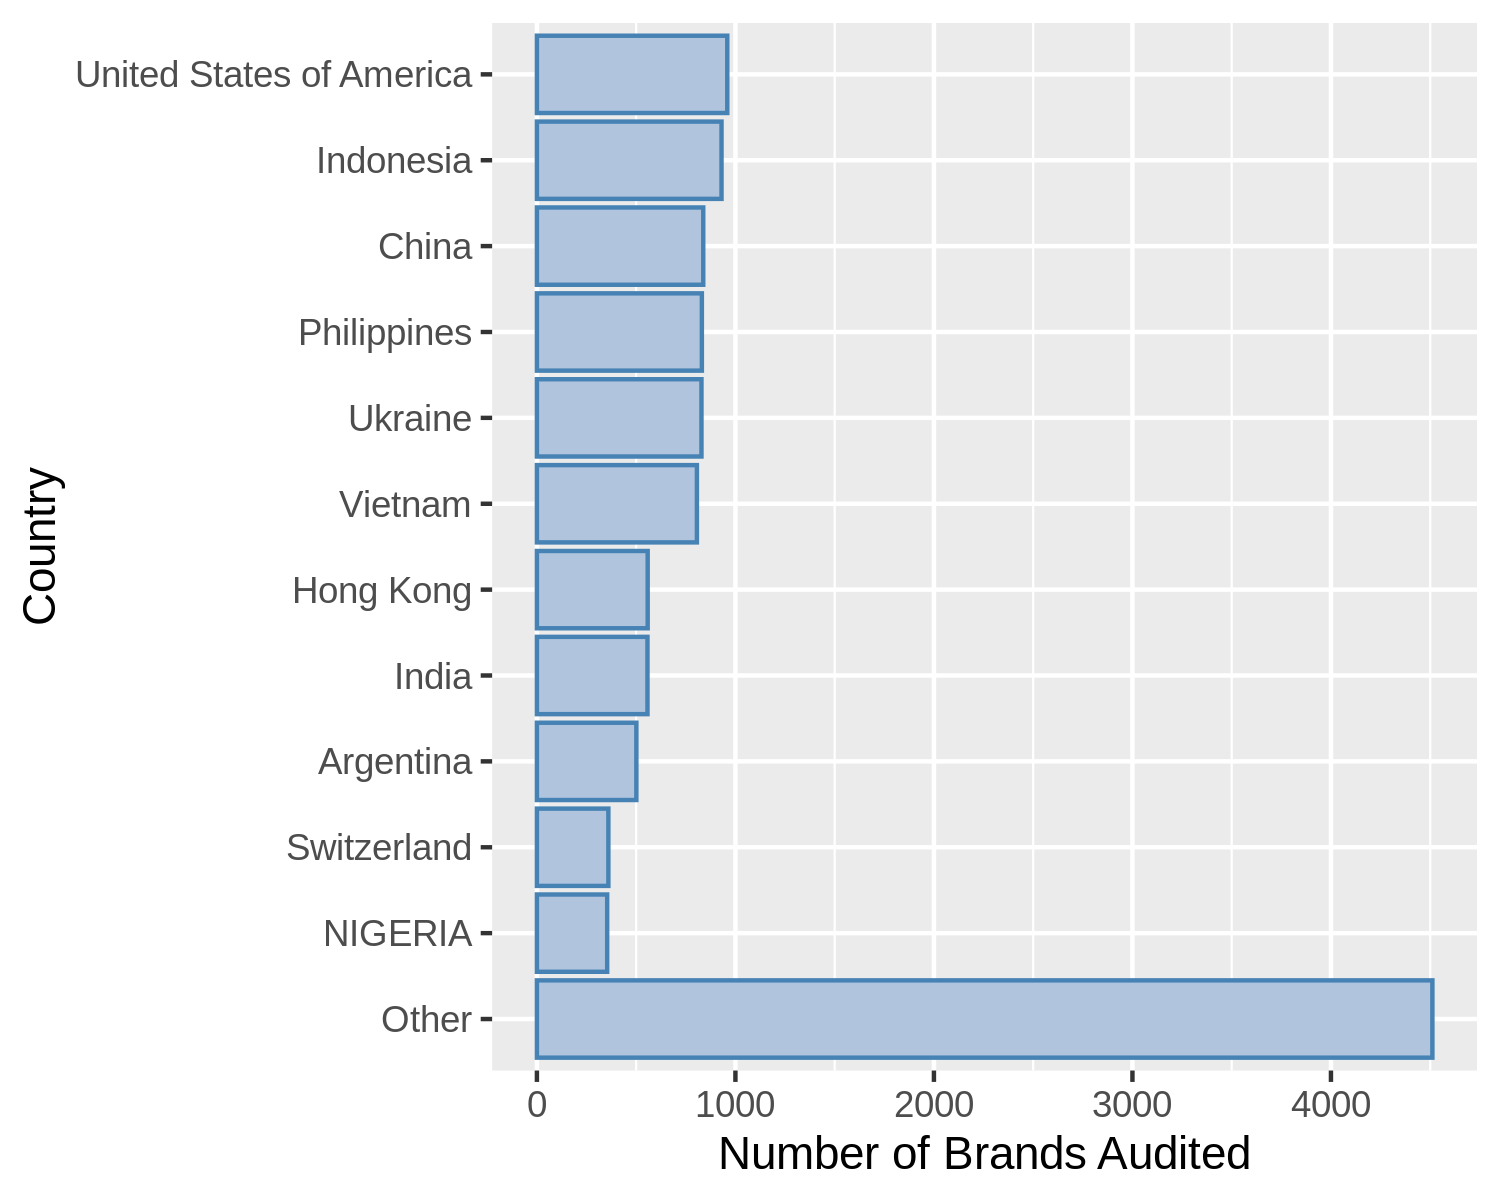

In [8]:
p = ggplot(df_plastics, aes(y=country))

p = p + geom_bar(fill="lightsteelblue", color="steelblue")

p = p + ylab("Country") + xlab("Number of Brands Audited")

p

Next, I wanted to look at the recycling codes of the plastics making up the total plastics in the U.S. Looking only at the data for the U.S's grand total, I pivoted the data set longer, so that each plastic type/recycling code had its own observation. I also turned each value into a percentage of the total plastics, and made missing values 0. Then, I created a graph of the values, with a label for polypropylene--the plastic type with the highest value.

In [44]:
recycling_codes = plastics %>%
    filter(country == "United States of America") %>%
    filter(parent_company == "Grand Total") %>%
    pivot_longer(one_of('hdpe', 'ldpe', 'o', 'pet', 'pp', 'ps', 'pvc'), 
                 names_to = 'recycling_code', 
                 values_to = 'value') %>%
    mutate(value = ifelse(is.na(value), 0, value)) %>%
    mutate(value = value/grand_total*100)

In [72]:
library(ggrepel)

df_label = recycling_codes %>%
    filter(recycling_code=="pp")

### Percentage of Plastics by Recycling Code in Total American Plastics

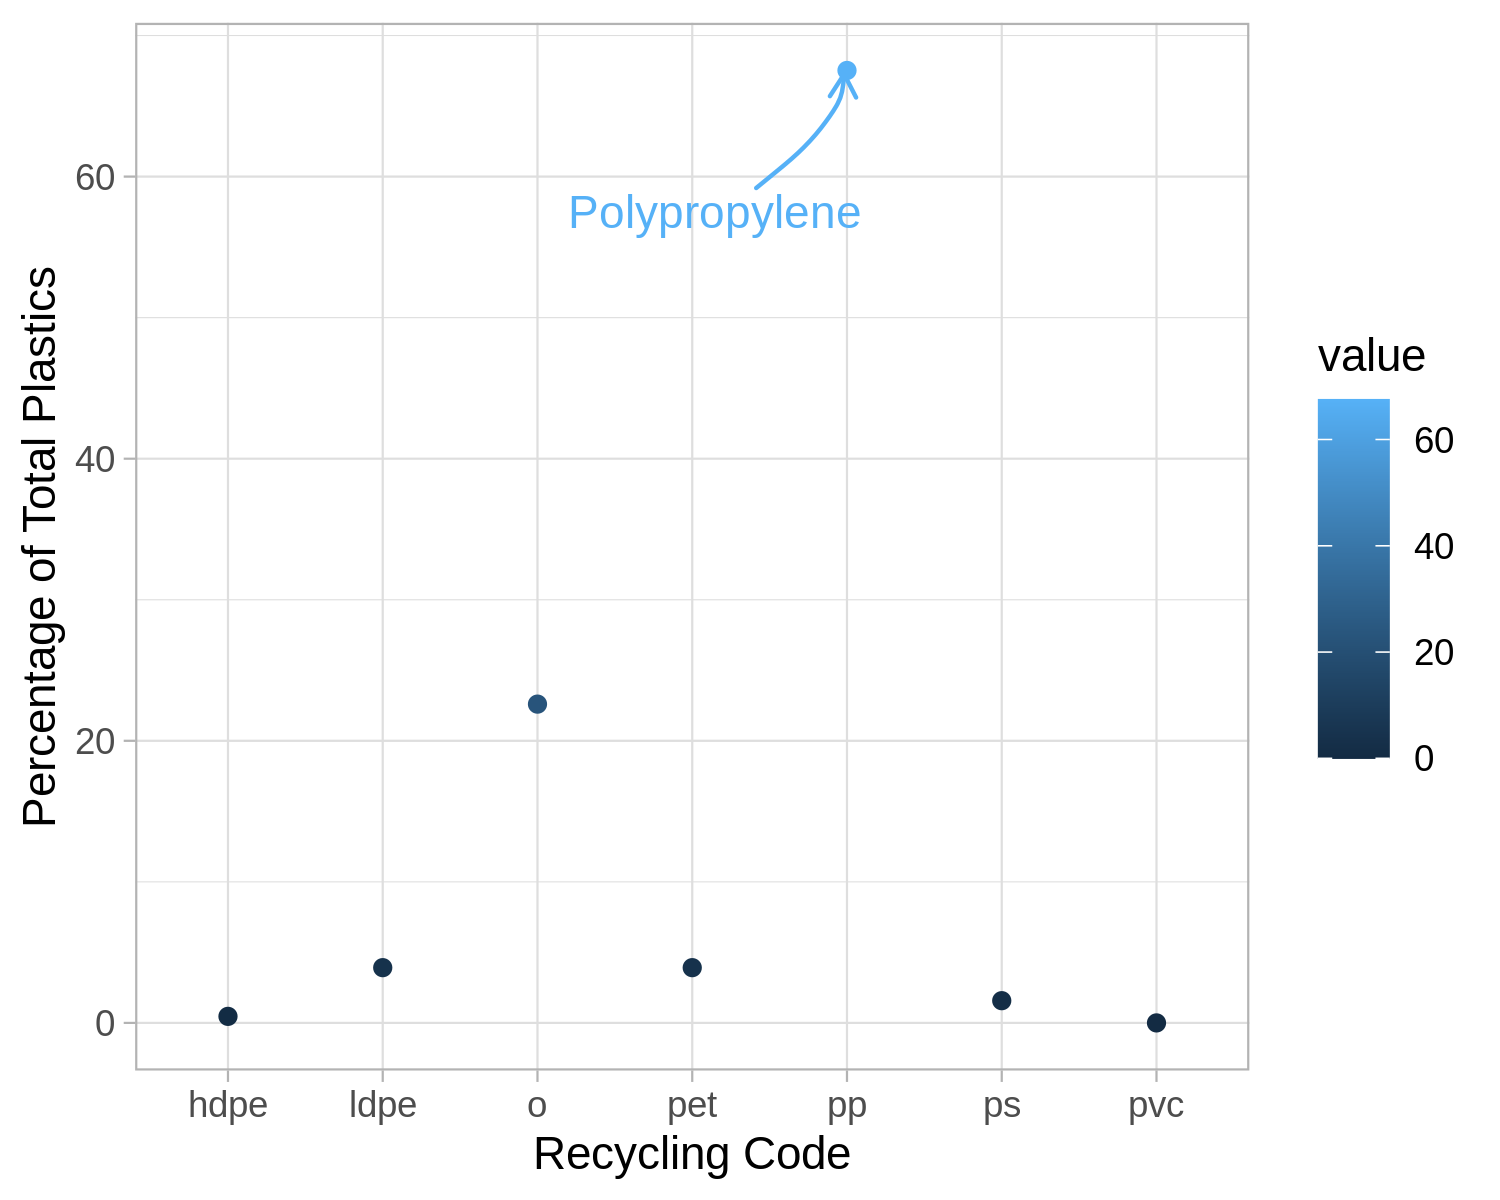

In [71]:
p = ggplot(recycling_codes, aes(x=recycling_code, y=value, color=value))

p = p + geom_point()

p = p + theme_light()

p = p + xlab("Recycling Code") + ylab("Percentage of Total Plastics")

p = p + geom_text_repel(
    data = df_label, mapping=aes(x=recycling_code, y=value), 
    nudge_x = 0,
    nudge_y = -10,
    segment.curvature = 0.1,
    label = "Polypropylene",
    hjust= "right",
    arrow = arrow(length = unit(0.025, "npc"))
)

p

Thank you for reading my project! I had a lot of fun in this class, and learned a lot. 